In [1]:
from __future__ import division, print_function
%matplotlib inline
from importlib import reload  # Python 3
import utils_code; reload(utils_code)
from utils_code import *

Using TensorFlow backend.


## Get data, get valid set and normalization

In [2]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

print('Training set size: {}'.format(X_train.shape))
print('Testing set size: {}'.format(X_test.shape))

Training set size: (60000, 784)
Testing set size: (10000, 784)


In [3]:
def reshape_img(x):
#     x = x/255
    return x.reshape(x.shape[0],28,28,1)
X_train = reshape_img(X_train)
X_test = reshape_img(X_test)
print('Training set size: {}'.format(X_train.shape))
print('Testing set size: {}'.format(X_test.shape))

Training set size: (60000, 28, 28, 1)
Testing set size: (10000, 28, 28, 1)


In [4]:
X_valid = X_train[50000:]
y_valid = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
print("size of training set: {}".format(X_train.shape))
print("size of valid set: {}".format(X_valid.shape))
print("size of test set: {}".format(X_test.shape))

size of training set: (50000, 28, 28, 1)
size of valid set: (10000, 28, 28, 1)
size of test set: (10000, 28, 28, 1)


In [5]:
y_train = onehot(y_train)
y_test = onehot(y_test)
y_valid = onehot(y_valid)


In [6]:
labels={
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot',
}

In [7]:
# normalization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
print(mean_px)
print(std_px)

72.8022
89.96


In [8]:
def norm_input(x): return (x-mean_px)/std_px

In [15]:
# # apply normalization to test and valid set
# X_valid = norm_input(X_valid)
# X_test = norm_input(X_test)

## Apply learning models


In [9]:
batch_size=64

In [10]:
from keras.initializers import VarianceScaling,glorot_normal
def test_set_accuracy(model):
    score = model.evaluate(X_test,y_test,verbose=1)
    print()
    print(score)
    print('\n', 'Accuracy on test set:', score[1])
def get_initializer():
    return VarianceScaling(seed=1)

### Linear models

In [11]:
def get_lin_model():
    model = Sequential([
        Lambda(norm_input, input_shape=(28,28,1)),
        Flatten(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
lm = get_lin_model()
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_valid,y_valid,batch_size = batch_size)
# test_batches = gen.flow(X_test, y_test, batch_size=batch_size)
steps_per_epoch = int(np.ceil(batches.n/batch_size))
validation_steps = int(np.ceil(val_batches.n/batch_size))

In [13]:
lm.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=1, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/1
782/782 [==============================] - 3s - loss: 0.5775 - acc: 0.7941 - val_loss: 0.4956 - val_acc: 0.8269


In [14]:
lm.optimizer.lr=0.1
lm.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=2, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/2
782/782 [==============================] - 2s - loss: 0.4556 - acc: 0.8411 - val_loss: 0.4577 - val_acc: 0.8381
Epoch 2/2
782/782 [==============================] - 2s - loss: 0.4351 - acc: 0.8481 - val_loss: 0.4469 - val_acc: 0.8408


In [15]:
lm.optimizer.lr=0.001
lm.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=2, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/2
782/782 [==============================] - 3s - loss: 0.4263 - acc: 0.8522 - val_loss: 0.4404 - val_acc: 0.8468
Epoch 2/2
782/782 [==============================] - 2s - loss: 0.4144 - acc: 0.8556 - val_loss: 0.4360 - val_acc: 0.8485


In [16]:
lm.optimizer.lr=0.01
lm.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=8, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/8
782/782 [==============================] - 2s - loss: 0.4121 - acc: 0.8559 - val_loss: 0.4476 - val_acc: 0.8438
Epoch 2/8
782/782 [==============================] - 2s - loss: 0.4101 - acc: 0.8575 - val_loss: 0.4166 - val_acc: 0.8470
Epoch 3/8
782/782 [==============================] - 2s - loss: 0.3994 - acc: 0.8596 - val_loss: 0.4465 - val_acc: 0.8459
Epoch 4/8
782/782 [==============================] - 2s - loss: 0.3958 - acc: 0.8620 - val_loss: 0.4340 - val_acc: 0.8481
Epoch 5/8
782/782 [==============================] - 2s - loss: 0.3996 - acc: 0.8599 - val_loss: 0.4438 - val_acc: 0.8459
Epoch 6/8
782/782 [==============================] - 2s - loss: 0.3949 - acc: 0.8612 - val_loss: 0.4497 - val_acc: 0.8406
Epoch 7/8
782/782 [==============================] - 2s - loss: 0.3929 - acc: 0.8636 - val_loss: 0.4486 - val_acc: 0.8454
Epoch 8/8
782/782 [==============================] - 2s - loss: 0.3918 - acc: 0.8622 - val_loss: 0.4321 - val_acc: 0.8483


In [17]:
lm.optimizer.lr=0.001
lm.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=4, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/4
782/782 [==============================] - 2s - loss: 0.3868 - acc: 0.8639 - val_loss: 0.4444 - val_acc: 0.8395
Epoch 2/4
782/782 [==============================] - 2s - loss: 0.3848 - acc: 0.8650 - val_loss: 0.4368 - val_acc: 0.8454
Epoch 3/4
782/782 [==============================] - 2s - loss: 0.3855 - acc: 0.8645 - val_loss: 0.4465 - val_acc: 0.8447
Epoch 4/4
782/782 [==============================] - 2s - loss: 0.3855 - acc: 0.8643 - val_loss: 0.4594 - val_acc: 0.8429


In [23]:
test_set_accuracy(lm)

 9696/10000 [============================>.] - ETA: 0s
[0.47907687935829163, 0.8347]

 Accuracy on test set: 0.8347


### Neural Network with 1 hidden layer

In [12]:

def neural_net():
    model = Sequential([
        Lambda(norm_input, input_shape=(28,28,1)),
        Flatten(),
        Dense(512,activation='relu',kernel_initializer = get_initializer()),
        Dense(10, activation='softmax',kernel_initializer = get_initializer())
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [72]:
nn = neural_net()
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_valid,y_valid,batch_size = batch_size)
# test_batches = gen.flow(X_test, y_test, batch_size=batch_size)
steps_per_epoch = int(np.ceil(batches.n/batch_size))
validation_steps = int(np.ceil(val_batches.n/batch_size))

In [73]:
nn.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=2, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/2
782/782 [==============================] - 3s - loss: 0.4540 - acc: 0.8365 - val_loss: 0.3751 - val_acc: 0.8640
Epoch 2/2
782/782 [==============================] - 3s - loss: 0.3478 - acc: 0.8732 - val_loss: 0.3395 - val_acc: 0.8746


In [32]:
nn.optimizer.lr=0.01
nn.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=4, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/4
782/782 [==============================] - 3s - loss: 0.3112 - acc: 0.8867 - val_loss: 0.3411 - val_acc: 0.8750
Epoch 2/4
782/782 [==============================] - 3s - loss: 0.2853 - acc: 0.8928 - val_loss: 0.3355 - val_acc: 0.8805
Epoch 3/4
782/782 [==============================] - 3s - loss: 0.2629 - acc: 0.9014 - val_loss: 0.3374 - val_acc: 0.8834
Epoch 4/4
782/782 [==============================] - 3s - loss: 0.2453 - acc: 0.9081 - val_loss: 0.3691 - val_acc: 0.8706


In [33]:
nn.optimizer.lr=0.001
nn.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=8, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/8
782/782 [==============================] - 3s - loss: 0.2368 - acc: 0.9119 - val_loss: 0.3355 - val_acc: 0.8844
Epoch 2/8
782/782 [==============================] - 3s - loss: 0.2222 - acc: 0.9176 - val_loss: 0.3268 - val_acc: 0.8840
Epoch 3/8
782/782 [==============================] - 3s - loss: 0.2111 - acc: 0.9211 - val_loss: 0.3282 - val_acc: 0.8879
Epoch 4/8
782/782 [==============================] - 3s - loss: 0.1968 - acc: 0.9261 - val_loss: 0.3487 - val_acc: 0.8903
Epoch 5/8
782/782 [==============================] - 3s - loss: 0.1867 - acc: 0.9305 - val_loss: 0.3695 - val_acc: 0.8816
Epoch 6/8
782/782 [==============================] - 3s - loss: 0.1811 - acc: 0.9325 - val_loss: 0.3475 - val_acc: 0.8863
Epoch 7/8
782/782 [==============================] - 3s - loss: 0.1695 - acc: 0.9360 - val_loss: 0.3453 - val_acc: 0.8901
Epoch 8/8
782/782 [==============================] - 3s - loss: 0.1624 - acc: 0.9378 - val_loss: 0.3590 - val_acc: 0.8884


In [34]:
nn.optimizer.lr=0.0001
nn.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=2, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/2
782/782 [==============================] - 3s - loss: 0.1579 - acc: 0.9407 - val_loss: 0.3698 - val_acc: 0.8902
Epoch 2/2
782/782 [==============================] - 3s - loss: 0.1469 - acc: 0.9449 - val_loss: 0.3780 - val_acc: 0.8893


In [35]:
test_set_accuracy(nn)

 9664/10000 [===========================>..] - ETA: 0s
[0.40129989824891088, 0.88639999999999997]

 Accuracy on test set: 0.8864


### Lenet 5

In [13]:
def get_initializer():
    return VarianceScaling(seed=1204)

def lenet():
    model = Sequential([
        Lambda(norm_input, input_shape=(28,28,1)),
        Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',\

              ),
        MaxPooling2D(),
        Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',\

                     ),
        MaxPooling2D(),
        Flatten(),
        Dense(1024,activation='relu',\

                   ),
        Dense(10,activation='softmax',\

                   )
                    
    ])
    model.summary()
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [105]:
ln = lenet()
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_valid,y_valid,batch_size = batch_size)
# test_batches = gen.flow(X_test, y_test, batch_size=batch_size)
steps_per_epoch = int(np.ceil(batches.n/batch_size))
validation_steps = int(np.ceil(val_batches.n/batch_size))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_21 (Lambda)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 1024)              3212288   
__________

In [93]:
test_set_accuracy(ln)

 9568/10000 [===========================>..] - ETA: 0s
[0.42563023577937859, 0.91820000000000002]

 Accuracy on test set: 0.9182


In [106]:
ln.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=4, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/4
782/782 [==============================] - 10s - loss: 0.3785 - acc: 0.8631 - val_loss: 0.2729 - val_acc: 0.8987
Epoch 2/4
782/782 [==============================] - 10s - loss: 0.2429 - acc: 0.9097 - val_loss: 0.2440 - val_acc: 0.9103
Epoch 3/4
782/782 [==============================] - 10s - loss: 0.1930 - acc: 0.9293 - val_loss: 0.2177 - val_acc: 0.9188
Epoch 4/4
782/782 [==============================] - 10s - loss: 0.1565 - acc: 0.9423 - val_loss: 0.2270 - val_acc: 0.9177


In [108]:
ln.optimizer.lr=0.00001
ln.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=2, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/2
782/782 [==============================] - 10s - loss: 0.1233 - acc: 0.9553 - val_loss: 0.2252 - val_acc: 0.9226
Epoch 2/2
782/782 [==============================] - 10s - loss: 0.0976 - acc: 0.9635 - val_loss: 0.2789 - val_acc: 0.9141


In [110]:
ln.optimizer.lr=0.01
ln.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=2, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/2
782/782 [==============================] - 10s - loss: 0.0772 - acc: 0.9712 - val_loss: 0.2693 - val_acc: 0.9210
Epoch 2/2
782/782 [==============================] - 10s - loss: 0.0584 - acc: 0.9793 - val_loss: 0.2980 - val_acc: 0.9174


In [111]:
test_set_accuracy(ln)

 9952/10000 [============================>.] - ETA: 0s
[0.31714670702964065, 0.92069999999999996]

 Accuracy on test set: 0.9207


### Basic VGG

In [21]:
def basic_vgg():
    model = Sequential([
        Lambda(norm_input, input_shape=(28,28,1)),
        Conv2D(32,(3,3), activation='relu'),
        Conv2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Conv2D(64,(3,3), activation='relu'),
        Conv2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
vgg = basic_vgg()
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_valid,y_valid,batch_size = batch_size)
# test_batches = gen.flow(X_test, y_test, batch_size=batch_size)
steps_per_epoch = int(np.ceil(batches.n/batch_size))
validation_steps = int(np.ceil(val_batches.n/batch_size))

In [128]:
vgg.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=2, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/2
782/782 [==============================] - 11s - loss: 0.4481 - acc: 0.8361 - val_loss: 0.3211 - val_acc: 0.8816
Epoch 2/2
782/782 [==============================] - 10s - loss: 0.2739 - acc: 0.8994 - val_loss: 0.2722 - val_acc: 0.8974


In [129]:
vgg.optimizer.lr=0.1
vgg.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=1, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/1
782/782 [==============================] - 11s - loss: 0.2264 - acc: 0.9160 - val_loss: 0.2944 - val_acc: 0.9021


In [130]:
vgg.optimizer.lr=0.01
vgg.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=1, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/1
782/782 [==============================] - 10s - loss: 0.1925 - acc: 0.9292 - val_loss: 0.2384 - val_acc: 0.9167


In [131]:
vgg.optimizer.lr=0.001
vgg.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=2, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/2
782/782 [==============================] - 10s - loss: 0.1667 - acc: 0.9384 - val_loss: 0.2571 - val_acc: 0.9169
Epoch 2/2
782/782 [==============================] - 10s - loss: 0.1423 - acc: 0.9461 - val_loss: 0.2363 - val_acc: 0.9213


In [132]:
vgg.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=2, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/2
782/782 [==============================] - 10s - loss: 0.1213 - acc: 0.9554 - val_loss: 0.2433 - val_acc: 0.9194
Epoch 2/2
782/782 [==============================] - 10s - loss: 0.1024 - acc: 0.9620 - val_loss: 0.2753 - val_acc: 0.9194


In [133]:
vgg.optimizer.lr=0.00001
vgg.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=1, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/1
782/782 [==============================] - 10s - loss: 0.0825 - acc: 0.9690 - val_loss: 0.3017 - val_acc: 0.9182


In [134]:
vgg.optimizer.lr=0.000001
vgg.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=4, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/4
782/782 [==============================] - 10s - loss: 0.0739 - acc: 0.9724 - val_loss: 0.3261 - val_acc: 0.9141
Epoch 2/4
782/782 [==============================] - 10s - loss: 0.0616 - acc: 0.9771 - val_loss: 0.3271 - val_acc: 0.9179
Epoch 3/4
782/782 [==============================] - 10s - loss: 0.0529 - acc: 0.9800 - val_loss: 0.3606 - val_acc: 0.9196
Epoch 4/4
782/782 [==============================] - 10s - loss: 0.0459 - acc: 0.9831 - val_loss: 0.3671 - val_acc: 0.9189


In [140]:
vgg.optimizer.lr=0.001
vgg.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=1, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/1
782/782 [==============================] - 10s - loss: 0.0302 - acc: 0.9893 - val_loss: 0.4721 - val_acc: 0.9172


In [141]:
test_set_accuracy(vgg)


 9856/10000 [============================>.] - ETA: 0s
[0.4972336398329586, 0.91100000000000003]

 Accuracy on test set: 0.911


### Data Aug

In [23]:
import matplotlib.pyplot as plt         
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
def plot_image_augmentation(gen):
    for X_batch, y_batch in gen.flow(X_train, y_train, batch_size=9):
        # create a grid of 3x3 images
        for i in range(0, 9):
            plt.subplot(330 + 1 + i)
            plt.imshow(np.squeeze(X_batch[i]), cmap=cm.binary)
        # show the plot
        plt.show()
        break

In [16]:
# since image is already center and not rotating
gen = image.ImageDataGenerator(
                                shear_range=0.3,
#                                horizontal_flip=True
#                                 zoom_range=0.08
                                )
gen.fit(X_train)

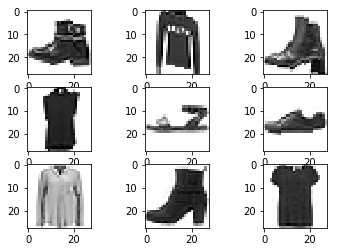

In [17]:
plot_image_augmentation(gen)

In [27]:
vgg = basic_vgg()
gen = image.ImageDataGenerator(
                                shear_range=0.3,
#                                fill_mode='constant'
#                                 zoom_range=0.08
                                )

In [28]:

batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_valid, y_valid, batch_size=batch_size)
steps_per_epoch = int(np.ceil(batches.n/batch_size))
validation_steps = int(np.ceil(valid_batches.n/batch_size))

In [29]:
vgg.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=2, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/2
782/782 [==============================] - 11s - loss: 0.4744 - acc: 0.8270 - val_loss: 0.3655 - val_acc: 0.8660
Epoch 2/2
782/782 [==============================] - 8s - loss: 0.2996 - acc: 0.8900 - val_loss: 0.2825 - val_acc: 0.8952


In [30]:
vgg.optimizer.lr=0.01
vgg.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=6, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/6
782/782 [==============================] - 8s - loss: 0.2535 - acc: 0.9074 - val_loss: 0.2807 - val_acc: 0.8979
Epoch 2/6
782/782 [==============================] - 8s - loss: 0.2289 - acc: 0.9151 - val_loss: 0.2575 - val_acc: 0.9073
Epoch 3/6
782/782 [==============================] - 7s - loss: 0.2048 - acc: 0.9249 - val_loss: 0.2512 - val_acc: 0.9111
Epoch 4/6
782/782 [==============================] - 8s - loss: 0.1882 - acc: 0.9297 - val_loss: 0.2675 - val_acc: 0.9051
Epoch 5/6
782/782 [==============================] - 8s - loss: 0.1729 - acc: 0.9354 - val_loss: 0.2419 - val_acc: 0.9129
Epoch 6/6
782/782 [==============================] - 8s - loss: 0.1573 - acc: 0.9405 - val_loss: 0.2363 - val_acc: 0.9233


In [31]:
vgg.optimizer.lr=0.001
vgg.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=4, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/4
782/782 [==============================] - 8s - loss: 0.1410 - acc: 0.9469 - val_loss: 0.2601 - val_acc: 0.9139
Epoch 2/4
782/782 [==============================] - 8s - loss: 0.1283 - acc: 0.9518 - val_loss: 0.2429 - val_acc: 0.9220
Epoch 3/4
782/782 [==============================] - 8s - loss: 0.1173 - acc: 0.9555 - val_loss: 0.2584 - val_acc: 0.9192
Epoch 4/4
782/782 [==============================] - 8s - loss: 0.1079 - acc: 0.9599 - val_loss: 0.2688 - val_acc: 0.9179


In [32]:
vgg.optimizer.lr=0.00001
vgg.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=4, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/4
782/782 [==============================] - 7s - loss: 0.1007 - acc: 0.9622 - val_loss: 0.2758 - val_acc: 0.9138
Epoch 2/4
782/782 [==============================] - 7s - loss: 0.0886 - acc: 0.9661 - val_loss: 0.3077 - val_acc: 0.9173
Epoch 3/4
782/782 [==============================] - 8s - loss: 0.0828 - acc: 0.9694 - val_loss: 0.3039 - val_acc: 0.9180
Epoch 4/4
782/782 [==============================] - 8s - loss: 0.0787 - acc: 0.9707 - val_loss: 0.3057 - val_acc: 0.9204


In [33]:
vgg.optimizer.lr=0.000001
vgg.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=2, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/2
782/782 [==============================] - 8s - loss: 0.0751 - acc: 0.9720 - val_loss: 0.3435 - val_acc: 0.9191
Epoch 2/2
782/782 [==============================] - 8s - loss: 0.0695 - acc: 0.9734 - val_loss: 0.3349 - val_acc: 0.9143


In [34]:
test_set_accuracy(vgg)

 9344/10000 [===========================>..] - ETA: 0s
[0.34395054425001143, 0.91720000000000002]

 Accuracy on test set: 0.9172


Best accuracy for test set is 0.9222 at shear_range=0.3

### Batch norm

In [48]:
def vgg_bn():
    model = Sequential([
        Lambda(norm_input, input_shape=(28,28,1)),
        Conv2D(32,(3,3), activation='relu'),
        BatchNormalization(),
        Conv2D(32,(3,3), activation='relu'),

        MaxPooling2D(),
        BatchNormalization(),
        Conv2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Conv2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
#         BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),

        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [49]:
vggbn = vgg_bn()
gen = image.ImageDataGenerator(shear_range=0.3)
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_valid,y_valid,batch_size = batch_size)
# test_batches = gen.flow(X_test, y_test, batch_size=batch_size)
steps_per_epoch = int(np.ceil(batches.n/batch_size))
validation_steps = int(np.ceil(val_batches.n/batch_size))

In [50]:
vggbn.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=4, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/4
782/782 [==============================] - 11s - loss: 0.5149 - acc: 0.8094 - val_loss: 0.4239 - val_acc: 0.8506
Epoch 2/4
782/782 [==============================] - 11s - loss: 0.3639 - acc: 0.8676 - val_loss: 0.3707 - val_acc: 0.8661
Epoch 3/4
782/782 [==============================] - 11s - loss: 0.3186 - acc: 0.8847 - val_loss: 0.3231 - val_acc: 0.8831
Epoch 4/4
782/782 [==============================] - 11s - loss: 0.2924 - acc: 0.8943 - val_loss: 0.3030 - val_acc: 0.8922


In [51]:
vggbn.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=8, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/8
782/782 [==============================] - 11s - loss: 0.2746 - acc: 0.8996 - val_loss: 0.3444 - val_acc: 0.8816
Epoch 2/8
782/782 [==============================] - 11s - loss: 0.2615 - acc: 0.9046 - val_loss: 0.3195 - val_acc: 0.8876
Epoch 3/8
782/782 [==============================] - 11s - loss: 0.2423 - acc: 0.9115 - val_loss: 0.3043 - val_acc: 0.8908
Epoch 4/8
782/782 [==============================] - 11s - loss: 0.2316 - acc: 0.9153 - val_loss: 0.2915 - val_acc: 0.8937
Epoch 5/8
782/782 [==============================] - 10s - loss: 0.2202 - acc: 0.9197 - val_loss: 0.3132 - val_acc: 0.8936
Epoch 6/8
782/782 [==============================] - 11s - loss: 0.2160 - acc: 0.9205 - val_loss: 0.3158 - val_acc: 0.8913
Epoch 7/8
782/782 [==============================] - 10s - loss: 0.2047 - acc: 0.9252 - val_loss: 0.2813 - val_acc: 0.9029
Epoch 8/8
782/782 [==============================] - 10s - loss: 0.1985 - acc: 0.9269 - val_loss: 0.2987 - val_acc: 0.8959


In [52]:
vggbn.optimizer.lr=0.00001
vggbn.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=6, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/6
782/782 [==============================] - 13s - loss: 0.1895 - acc: 0.9295 - val_loss: 0.2919 - val_acc: 0.8995
Epoch 2/6
782/782 [==============================] - 13s - loss: 0.1819 - acc: 0.9326 - val_loss: 0.3299 - val_acc: 0.8895
Epoch 3/6
782/782 [==============================] - 13s - loss: 0.1750 - acc: 0.9355 - val_loss: 0.2943 - val_acc: 0.9011
Epoch 4/6
782/782 [==============================] - 13s - loss: 0.1711 - acc: 0.9360 - val_loss: 0.3109 - val_acc: 0.8956
Epoch 5/6
782/782 [==============================] - 13s - loss: 0.1650 - acc: 0.9404 - val_loss: 0.3201 - val_acc: 0.8964
Epoch 6/6
782/782 [==============================] - 14s - loss: 0.1606 - acc: 0.9413 - val_loss: 0.3068 - val_acc: 0.9046


In [289]:
vggbn.optimizer.lr=0.00001
vggbn.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=8, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/8
782/782 [==============================] - 19s - loss: 0.1460 - acc: 0.9462 - val_loss: 0.2748 - val_acc: 0.9132
Epoch 2/8
782/782 [==============================] - 19s - loss: 0.1418 - acc: 0.9478 - val_loss: 0.3038 - val_acc: 0.9085
Epoch 3/8
782/782 [==============================] - 19s - loss: 0.1365 - acc: 0.9485 - val_loss: 0.2955 - val_acc: 0.9081
Epoch 4/8
782/782 [==============================] - 19s - loss: 0.1320 - acc: 0.9510 - val_loss: 0.2802 - val_acc: 0.9167
Epoch 5/8
782/782 [==============================] - 19s - loss: 0.1299 - acc: 0.9534 - val_loss: 0.2909 - val_acc: 0.9117
Epoch 6/8
782/782 [==============================] - 19s - loss: 0.1251 - acc: 0.9530 - val_loss: 0.3282 - val_acc: 0.9024
Epoch 7/8
782/782 [==============================] - 19s - loss: 0.1216 - acc: 0.9546 - val_loss: 0.2995 - val_acc: 0.9113
Epoch 8/8
782/782 [==============================] - 19s - loss: 0.1184 - acc: 0.9560 - val_loss: 0.3274 - val_acc: 0.9068


In [53]:
test_set_accuracy(vggbn)

 9792/10000 [============================>.] - ETA: 0s
[0.29696623489856722, 0.90610000000000002]

 Accuracy on test set: 0.9061


### Dropout

In [55]:
def vgg_bn_drop():
    model = Sequential([
        Lambda(norm_input, input_shape=(28,28,1)),
        Conv2D(32,(3,3), activation='relu'),
        BatchNormalization(),
        Conv2D(32,(3,3), activation='relu'),

        MaxPooling2D(),
        BatchNormalization(),
        Conv2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Conv2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
#         BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
vggbndrop = vgg_bn_drop()
gen = image.ImageDataGenerator(shear_range=0.3)
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_valid,y_valid,batch_size = batch_size)
# test_batches = gen.flow(X_test, y_test, batch_size=batch_size)
steps_per_epoch = int(np.ceil(batches.n/batch_size))
validation_steps = int(np.ceil(val_batches.n/batch_size))

In [56]:
vggbndrop.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=10, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/10
782/782 [==============================] - 13s - loss: 0.5748 - acc: 0.7910 - val_loss: 0.4447 - val_acc: 0.8413
Epoch 2/10
782/782 [==============================] - 11s - loss: 0.3914 - acc: 0.8597 - val_loss: 0.3802 - val_acc: 0.8673
Epoch 3/10
782/782 [==============================] - 11s - loss: 0.3387 - acc: 0.8776 - val_loss: 0.3151 - val_acc: 0.8849
Epoch 4/10
782/782 [==============================] - 11s - loss: 0.3069 - acc: 0.8895 - val_loss: 0.3197 - val_acc: 0.8829
Epoch 5/10
782/782 [==============================] - 11s - loss: 0.2870 - acc: 0.8958 - val_loss: 0.3371 - val_acc: 0.8796
Epoch 6/10
782/782 [==============================] - 11s - loss: 0.2687 - acc: 0.9030 - val_loss: 0.3316 - val_acc: 0.8777
Epoch 7/10
782/782 [==============================] - 11s - loss: 0.2523 - acc: 0.9086 - val_loss: 0.3561 - val_acc: 0.8731
Epoch 8/10
782/782 [==============================] - 11s - loss: 0.2431 - acc: 0.9118 - val_loss: 0.3013 - val_acc: 0.8964
Epoch 9/

In [59]:
vggbndrop.optimizer.lr=0.0001
vggbndrop.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=6, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/6
782/782 [==============================] - 10s - loss: 0.2152 - acc: 0.9217 - val_loss: 0.3048 - val_acc: 0.8972
Epoch 2/6
782/782 [==============================] - 10s - loss: 0.2033 - acc: 0.9267 - val_loss: 0.3094 - val_acc: 0.8967
Epoch 3/6
782/782 [==============================] - 10s - loss: 0.2008 - acc: 0.9269 - val_loss: 0.2783 - val_acc: 0.9030
Epoch 4/6
782/782 [==============================] - 10s - loss: 0.1918 - acc: 0.9313 - val_loss: 0.3463 - val_acc: 0.8805
Epoch 5/6
782/782 [==============================] - 10s - loss: 0.1829 - acc: 0.9330 - val_loss: 0.3277 - val_acc: 0.8922
Epoch 6/6
782/782 [==============================] - 10s - loss: 0.1798 - acc: 0.9344 - val_loss: 0.2835 - val_acc: 0.9051


In [60]:
vggbndrop.optimizer.lr=0.000001
vggbndrop.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=10, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/10
782/782 [==============================] - 10s - loss: 0.1714 - acc: 0.9373 - val_loss: 0.2840 - val_acc: 0.9020
Epoch 2/10
782/782 [==============================] - 10s - loss: 0.1670 - acc: 0.9390 - val_loss: 0.2969 - val_acc: 0.8979
Epoch 3/10
782/782 [==============================] - 10s - loss: 0.1671 - acc: 0.9394 - val_loss: 0.3278 - val_acc: 0.8926
Epoch 4/10
782/782 [==============================] - 10s - loss: 0.1577 - acc: 0.9416 - val_loss: 0.3217 - val_acc: 0.9019
Epoch 5/10
782/782 [==============================] - 10s - loss: 0.1558 - acc: 0.9427 - val_loss: 0.2979 - val_acc: 0.9020
Epoch 6/10
782/782 [==============================] - 11s - loss: 0.1478 - acc: 0.9452 - val_loss: 0.2827 - val_acc: 0.9098
Epoch 7/10
782/782 [==============================] - 11s - loss: 0.1473 - acc: 0.9466 - val_loss: 0.2993 - val_acc: 0.9045
Epoch 8/10
782/782 [==============================] - 11s - loss: 0.1442 - acc: 0.9473 - val_loss: 0.2987 - val_acc: 0.9043
Epoch 9/

In [61]:
vggbndrop.optimizer.lr=0.0000001
vggbndrop.fit_generator(batches, steps_per_epoch=steps_per_epoch, epochs=4, 
                    validation_data=val_batches, validation_steps=validation_steps)

Epoch 1/4
782/782 [==============================] - 10s - loss: 0.1321 - acc: 0.9517 - val_loss: 0.3276 - val_acc: 0.9001
Epoch 2/4
782/782 [==============================] - 11s - loss: 0.1281 - acc: 0.9534 - val_loss: 0.3144 - val_acc: 0.9010
Epoch 3/4
782/782 [==============================] - 10s - loss: 0.1277 - acc: 0.9537 - val_loss: 0.3383 - val_acc: 0.8993
Epoch 4/4
782/782 [==============================] - 12s - loss: 0.1250 - acc: 0.9537 - val_loss: 0.3267 - val_acc: 0.8997


In [62]:
test_set_accuracy(vggbndrop)

 9696/10000 [============================>.] - ETA: 0s
[0.33883959484398363, 0.90069999999999995]

 Accuracy on test set: 0.9007
